In [15]:
import numpy as np

# Problem 1

In [10]:
def prob1(F, x0, F_prime, tol = 1e-5, maxiters = 15):
    converged = False
    num_iters = maxiters
    for k in range(maxiters):
        print(x0)
        x1 = x0 - F(x0)/F_prime(x0)
        if abs(x1-x0)<tol:
            converged = True
            num_iters = k+1
            break
        x0 = x1
    return x0, converged, num_iters

In [11]:
F = lambda x: np.exp(x) - 2
F_prime = lambda x: np.exp(x)

In [12]:
prob1(F, 2, F_prime)

2
1.2706705664732254
0.8319573037399686
0.7023505840171669
0.6931894022505122
0.6931471814512683


(0.6931471814512683, True, 6)

# Problem 3

In [6]:
from autograd import numpy as anp
from autograd import grad

In [11]:
def prob2(F, x0, F_prime,a=1, tol = 1e-5, maxiters = 15):
    converged = False
    num_iters = maxiters
    for k in range(maxiters):
        x1 = x0 - a*F(x0)/F_prime(x0)
        if abs(x1-x0)<tol:
            converged = True
            num_iters = k+1
            break
        x0 = x1
    return x0, converged, num_iters

In [12]:
F = lambda x: anp.sign(x)*anp.power(anp.abs(x), 1./3)
F_prime = grad(F)

In [13]:
prob2(F, .01, F_prime, a = 1)

(-327.6800000000008, False, 15)

In [14]:
prob2(F, .01, F_prime, a = .4)

(-3.199999999999966e-06, True, 6)

# Problem 4

In [85]:
agrid = np.linspace(0,1,11)

In [86]:
F = lambda x: anp.sign(x)*anp.power(anp.abs(x), 1./3)
F_prime = grad(F)

In [87]:
from matplotlib import pyplot as plt

In [119]:
def prob3(F, x0, F_prime, tol = 1e-5, maxiters = 15):
    xpoints = []
    ypoints = []
    for a in agrid:
        xpoints.append(a)
        temp_res = prob2(F, x0, F_prime, a)
        ypoints.append(temp_res[2])    
    xpoints = np.array(xpoints[1:])
    ypoints = np.array(ypoints[1:])
    plt.scatter(xpoints, ypoints)
    plt.show()
    return(xpoints[np.argmin(ypoints)])

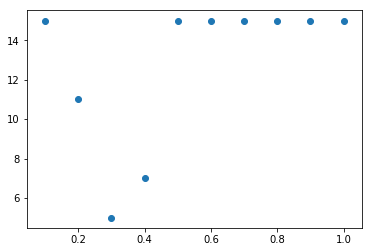

0.30000000000000004

In [121]:
prob3(F, .01, F_prime)

# Problem 7

In [174]:
from matplotlib import pyplot as plt

In [208]:
def prob7(f, Df, zeros, bounds, res, iters):
    rmin, rmax, imin, imax = bounds
    x_real = np.linspace(rmin, rmax, res)
    x_imag = np.linspace(imin, imax, res)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X_0 = X_real + 1j*X_imag
    for i in range(iters):
        X_1 = X_0 - f(X_0)/Df(X_0)
        X_0 = X_1
    Y = []
    for x in X_0.flatten():
        dist_2 = (zeros - x)**2        
        Y.append(np.argmin(dist_2))
    Y = np.array(Y)
    Y = np.reshape(Y, (500,500))
    plt.pcolormesh(X_real, X_imag, Y, cmap="brg")

In [209]:
f = lambda x: np.power(x,3)-1
Df = lambda x: 3*np.power(x,2)

In [210]:
res = 500
bounds = [-1.5, 1.5, -1.5, 1.5]
iters = 20
zeros = np.array([1, -1/2 + np.sqrt(3)/2j, -1/2 - np.sqrt(3)/2j])

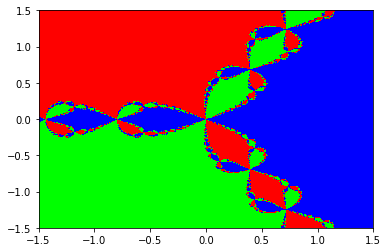

In [211]:
prob7(f, Df, zeros, bounds, res, iters)

In [213]:
f = lambda x: np.power(x,3)-x
Df = lambda x: 3*np.power(x,2) - 1
zeros = np.array([-1,0,1])

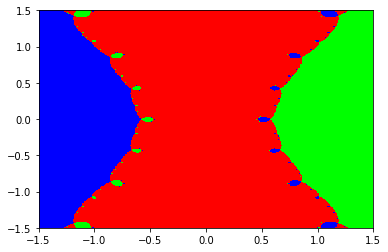

In [214]:
prob7(f, Df, zeros, bounds, res, iters)